In [124]:
import numpy as np
import pandas as pd
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

In [125]:
data= pd.read_csv(r"C:\Users\sarth\OneDrive\Desktop\Machine Learning Kaggle\Multiple linear regression\Multplr_LR_Code_for Udemy\Advrt.csv")

In [126]:
#The data shows the advertisement done on Tv, radio and newspaper and respective sales we got from them.
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [127]:
len(data)

200

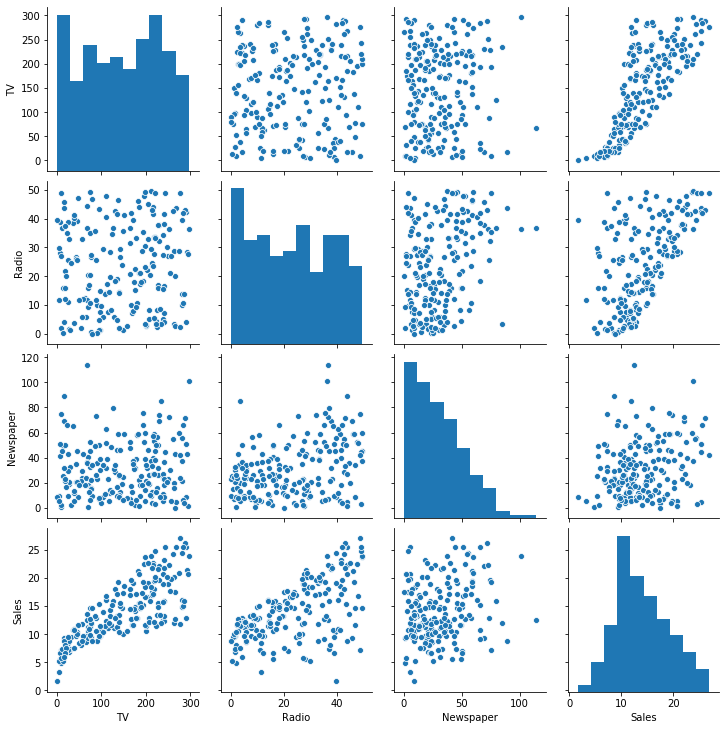

In [128]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(data)

# Forming correlation matrix

In [129]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


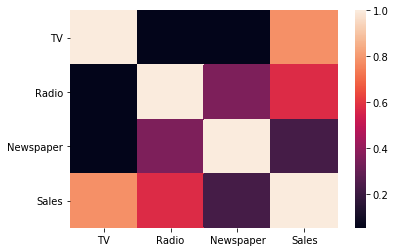

In [130]:
sns.heatmap(data.corr())

## Normality Check on the Dependent Variable

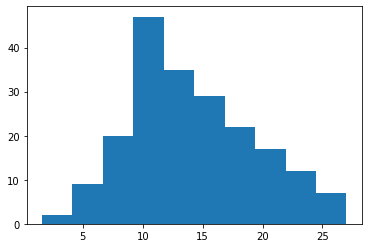

In [131]:
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

# histogram plot
pyplot.hist(data['Sales'])
pyplot.show()

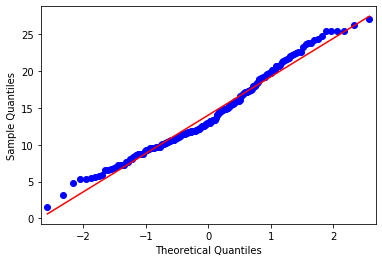

In [132]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(data['Sales'], line='s')
pyplot.show()

In [133]:
len(data)

200

## IQR test for the outliers

In [134]:
#Finding the IQR value for the dataframe
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TV           144.450
Radio         26.550
Newspaper     32.350
Sales          7.025
dtype: float64


In [135]:
#check what values are out of the range of IQR values
check =data[(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))]
check

,TV,Radio,Newspaper,Sales
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
195,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN


## Z value Test for the outliers and removing them

In [136]:
#Taking only those points having z value less than 3
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
#Taking only those points having z value less than 3
data = data[(z < 3).all(axis=1)]
data.shape

(198, 4)

In [137]:
#Removing those data points lying out of the IQR range
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape #This hsows the shape of the dataframe after removing outliers

(198, 4)

# Taking all the IVs

In [138]:
len(data)

198

In [139]:
train= data.iloc[:139,]
test= data.iloc[139:,]

In [140]:
train_x= train[['TV','Radio','Newspaper']]
train_y= train[['Sales']]
test_x= test[['TV','Radio','Newspaper']]
test_y= test[['Sales']]

In [141]:
model= LinearRegression()

In [142]:
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
print(model.coef_, model.intercept_)

[[ 0.04686697  0.17975416 -0.00418385]] [3.11159385]


In [144]:
predict = model.predict(train_x)

In [145]:
future= model.predict(test_x)

In [146]:
mse_predict= mean_squared_error(predict,train_y)
r_predict= r2_score(predict,train_y)
print(mse_predict)
print(r_predict)

2.960847282686351
0.8775333432719153


In [147]:
mse_future= mean_squared_error(future,test_y)
r_future= r2_score(future,test_y)
print(mse_future)
print(r_future)

2.5754241140748615
0.8903724346498372


Text(0, 0.5, 'Sales')

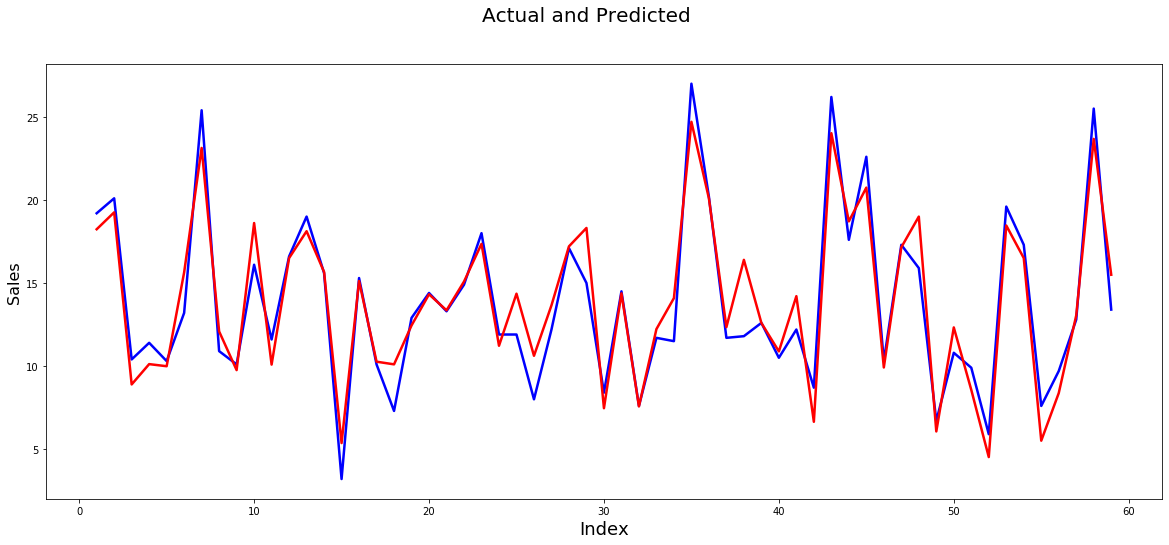

In [148]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,60,1)]         # generating index 
fig = plt.figure(figsize=(20,8))
plt.plot(c,test_y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,future, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'Sales')

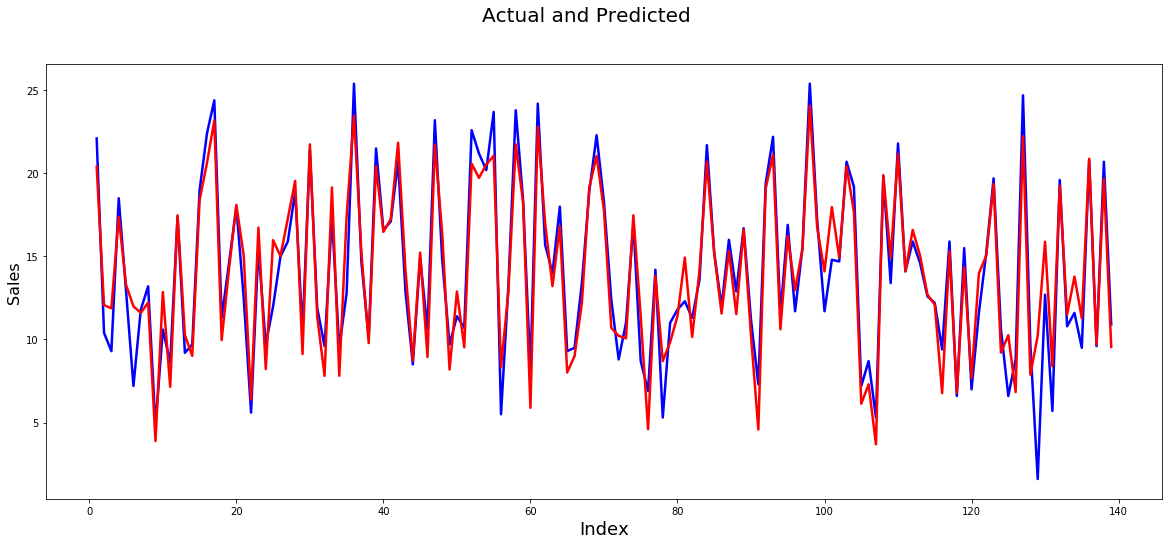

In [149]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,140,1)]         # generating index 
fig = plt.figure(figsize=(20,8))
plt.plot(c,train_y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,predict, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

## This is the optional step and checking P value for the parameters

In [150]:
import statsmodels.api as sm
X_train_sm = train_x
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(train_y,X_train_sm).fit()

# print the coefficients
lm_1.params

const        3.111594
TV           0.046867
Radio        0.179754
Newspaper   -0.004184
dtype: float64

In [151]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     367.4
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           9.98e-65
Time:                        22:57:16   Log-Likelihood:                -272.67
No. Observations:                 139   AIC:                             553.3
Df Residuals:                     135   BIC:                             565.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1116      0.399      7.796      0.0

In [152]:
train_x1= train[['TV','Radio']]
train_y1= train[['Sales']]
test_x1= test[['TV','Radio']]
test_y1= test[['Sales']]
#eliminating Newspaper as per the P value as value is greater than 0.05 and its ing=significant.

In [153]:
import statsmodels.api as sm
X_train_sm = train_x1
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(train_y,X_train_sm).fit()

# print the coefficients
lm_1.params

const    3.030189
TV       0.046890
Radio    0.177610
dtype: float64

In [154]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     553.9
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           4.35e-66
Time:                        22:57:16   Log-Likelihood:                -272.83
No. Observations:                 139   AIC:                             551.7
Df Residuals:                     136   BIC:                             560.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0302      0.369      8.207      0.0

## Recursive feature elimination:Model refienment using RFE

In [155]:
# The goal of recursive feature elimination (RFE) is to select features by 
# recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial 
# set of features and the importance of each feature is obtained either through a coef_ attribute 
# or through a feature_importances_ attribute. Then, the less important features are pruned from the the current set of features. 
# This procedure is recursively repeated on the pruned dataset until the desired number of features to select is reached.

In [156]:
from sklearn.feature_selection import RFE
lm= LinearRegression()

In [157]:
rfe = RFE(lm, 2)

In [158]:
rfe= rfe.fit(train_x,train_y)

C:\Users\sarth\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [159]:
print(rfe.support_)

[ True  True False]


In [160]:
print(rfe.ranking_)

[1 1 2]
